In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

# Library for train test split
from sklearn.model_selection import train_test_split

# Library for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Library for scaling
from sklearn.preprocessing import MinMaxScaler

# Library for Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
train = pd.read_csv("Train (1).csv")
test = pd.read_csv("Test.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train['source']='train'
test['source']='test'

#combining the dataframes into one dataset
data = pd.concat([train, test],ignore_index=True)

print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
data.shape

(14204, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [10]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [14]:
data.Item_Weight.isnull().sum()

np.int64(2439)

In [15]:
data["Item_Weight"].fillna(data.groupby(by ='Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)

#Checking the number of missing values
data.Item_Weight.isnull().sum()

C:\Users\cyphe\AppData\Local\Temp\ipykernel_11144\895653993.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Item_Weight"].fillna(data.groupby(by ='Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)


np.int64(0)

In [16]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [17]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

# checking if replacement has taken place or not
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [18]:
data['Item_Visibility'] = data['Item_Visibility'].replace("0","NaN")

In [19]:
data['Item_Visibility'].fillna(data.groupby(by ='Item_Identifier')['Item_Visibility'].transform('mean'),inplace = True)

C:\Users\cyphe\AppData\Local\Temp\ipykernel_11144\2279155637.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Visibility'].fillna(data.groupby(by ='Item_Identifier')['Item_Visibility'].transform('mean'),inplace = True)


In [20]:
data.Item_Visibility.isnull().sum()

np.int64(0)

In [21]:
data.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [22]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

# checking the count of values
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [23]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64

In [24]:
data.Outlet_Size.value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [25]:
data.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

In [26]:
data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [27]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  obj

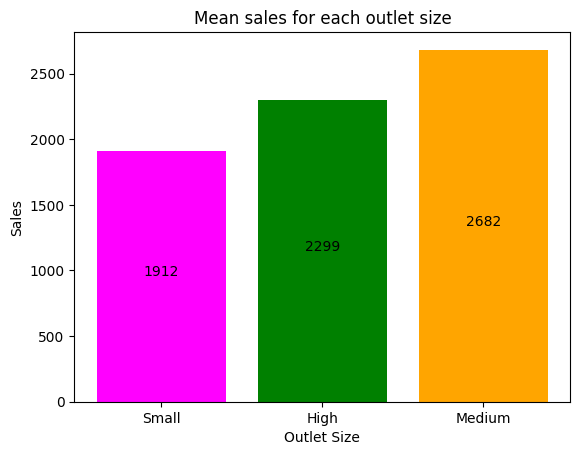

In [31]:
sales_by_outlet_size = data.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index.tolist()
y = sales_by_outlet_size.values.tolist()



# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')

# set axis labels
plt.xlabel('Outlet Size')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each outlet size')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

ax = plt.bar(x,y, color =['magenta','green','orange'])

    
# calling the function to add value labels
addlabels(x, y)

plt.show()

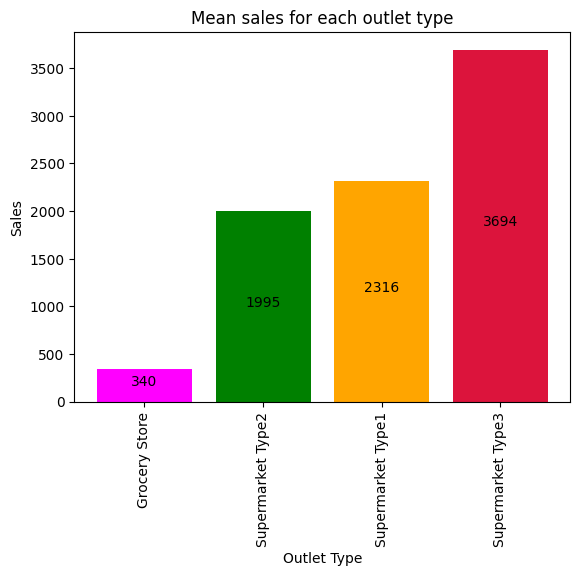

In [32]:
sales_by_outlet_type = data.groupby('Outlet_Type').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_type.sort_values(inplace=True)

x = sales_by_outlet_type.index.tolist()
y = sales_by_outlet_type.values.tolist()


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')

# set axis labels
plt.xlabel('Outlet Type')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each outlet type')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation = 90)

ax = plt.bar(x,y, color =['magenta','green','orange','crimson'])

    
# calling the function to add value labels
addlabels(x, y)

plt.show()

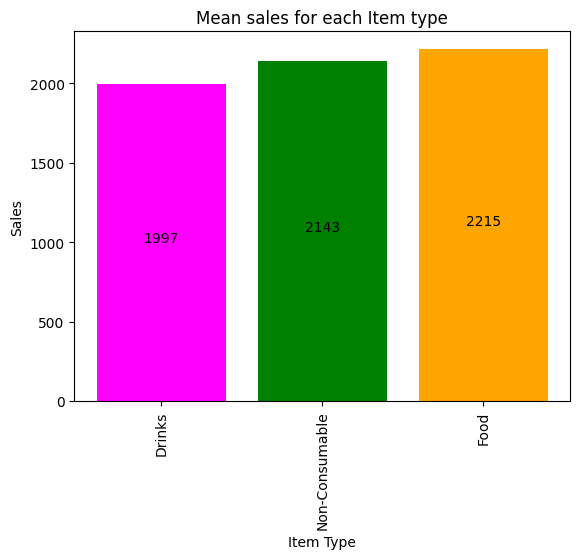

In [33]:
sales_by_Item_Type = data.groupby('Item_Type_Combined').Item_Outlet_Sales.mean()

# sort by sales
sales_by_Item_Type.sort_values(inplace=True)

x = sales_by_Item_Type.index.tolist()
y = sales_by_Item_Type.values.tolist()


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')

# set axis labels
plt.xlabel('Item Type')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each Item type')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation = 90)

ax = plt.bar(x,y, color =['magenta','green','orange','crimson'])

    
# calling the function to add value labels
addlabels(x, y)

plt.show()

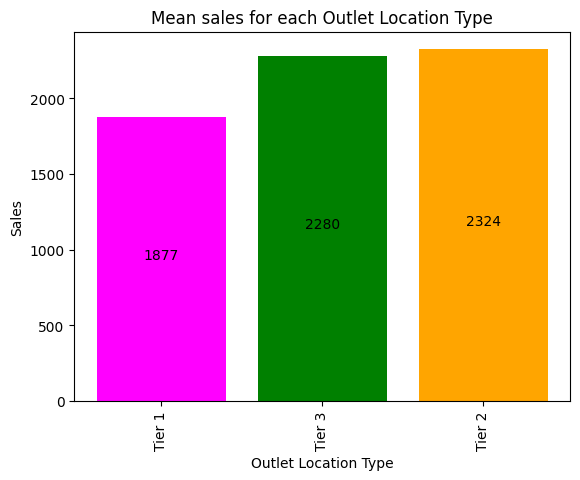

In [34]:
sales_by_Outlet_Location_Type = data.groupby('Outlet_Location_Type').Item_Outlet_Sales.mean()

# sort by sales
sales_by_Outlet_Location_Type.sort_values(inplace=True)

x = sales_by_Outlet_Location_Type.index.tolist()
y = sales_by_Outlet_Location_Type.values.tolist()


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')

# set axis labels
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each Outlet Location Type')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation = 90)

ax = plt.bar(x,y, color =['magenta','green','orange','crimson'])

    
# calling the function to add value labels
addlabels(x, y)

plt.show()

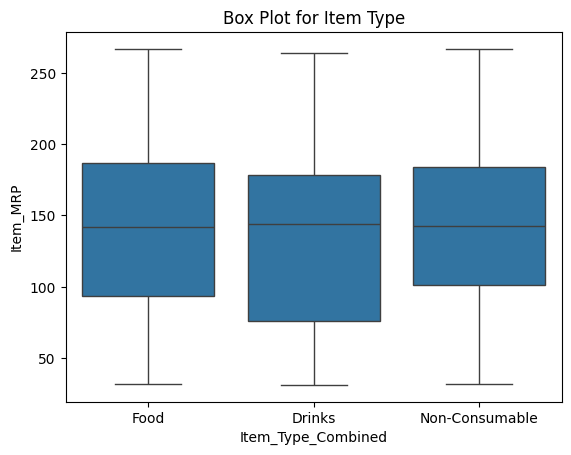

In [35]:
plt.title('Box Plot for Item Type')


sns.boxplot(x="Item_Type_Combined", y="Item_MRP", data=data)
plt.show()

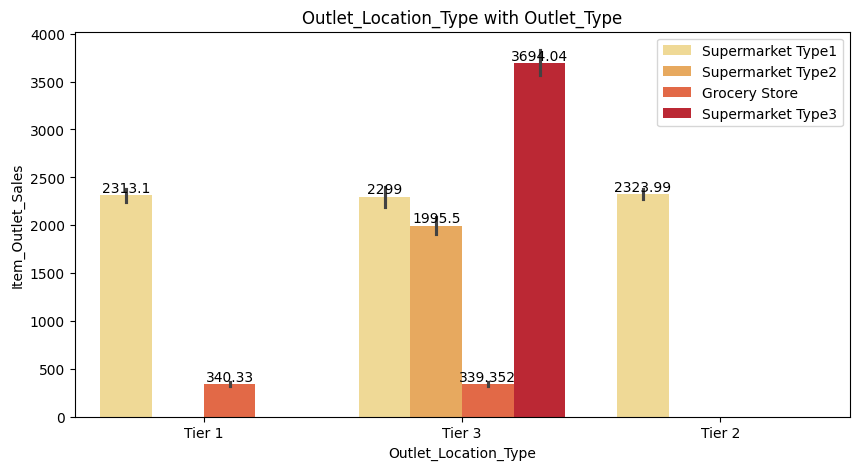

In [36]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Outlet_Location_Type',y ='Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='YlOrRd',estimator = 'mean')


for i in ax.containers:
    ax.bar_label(i,)


plt.title('Outlet_Location_Type with Outlet_Type')
plt.legend()
plt.show()

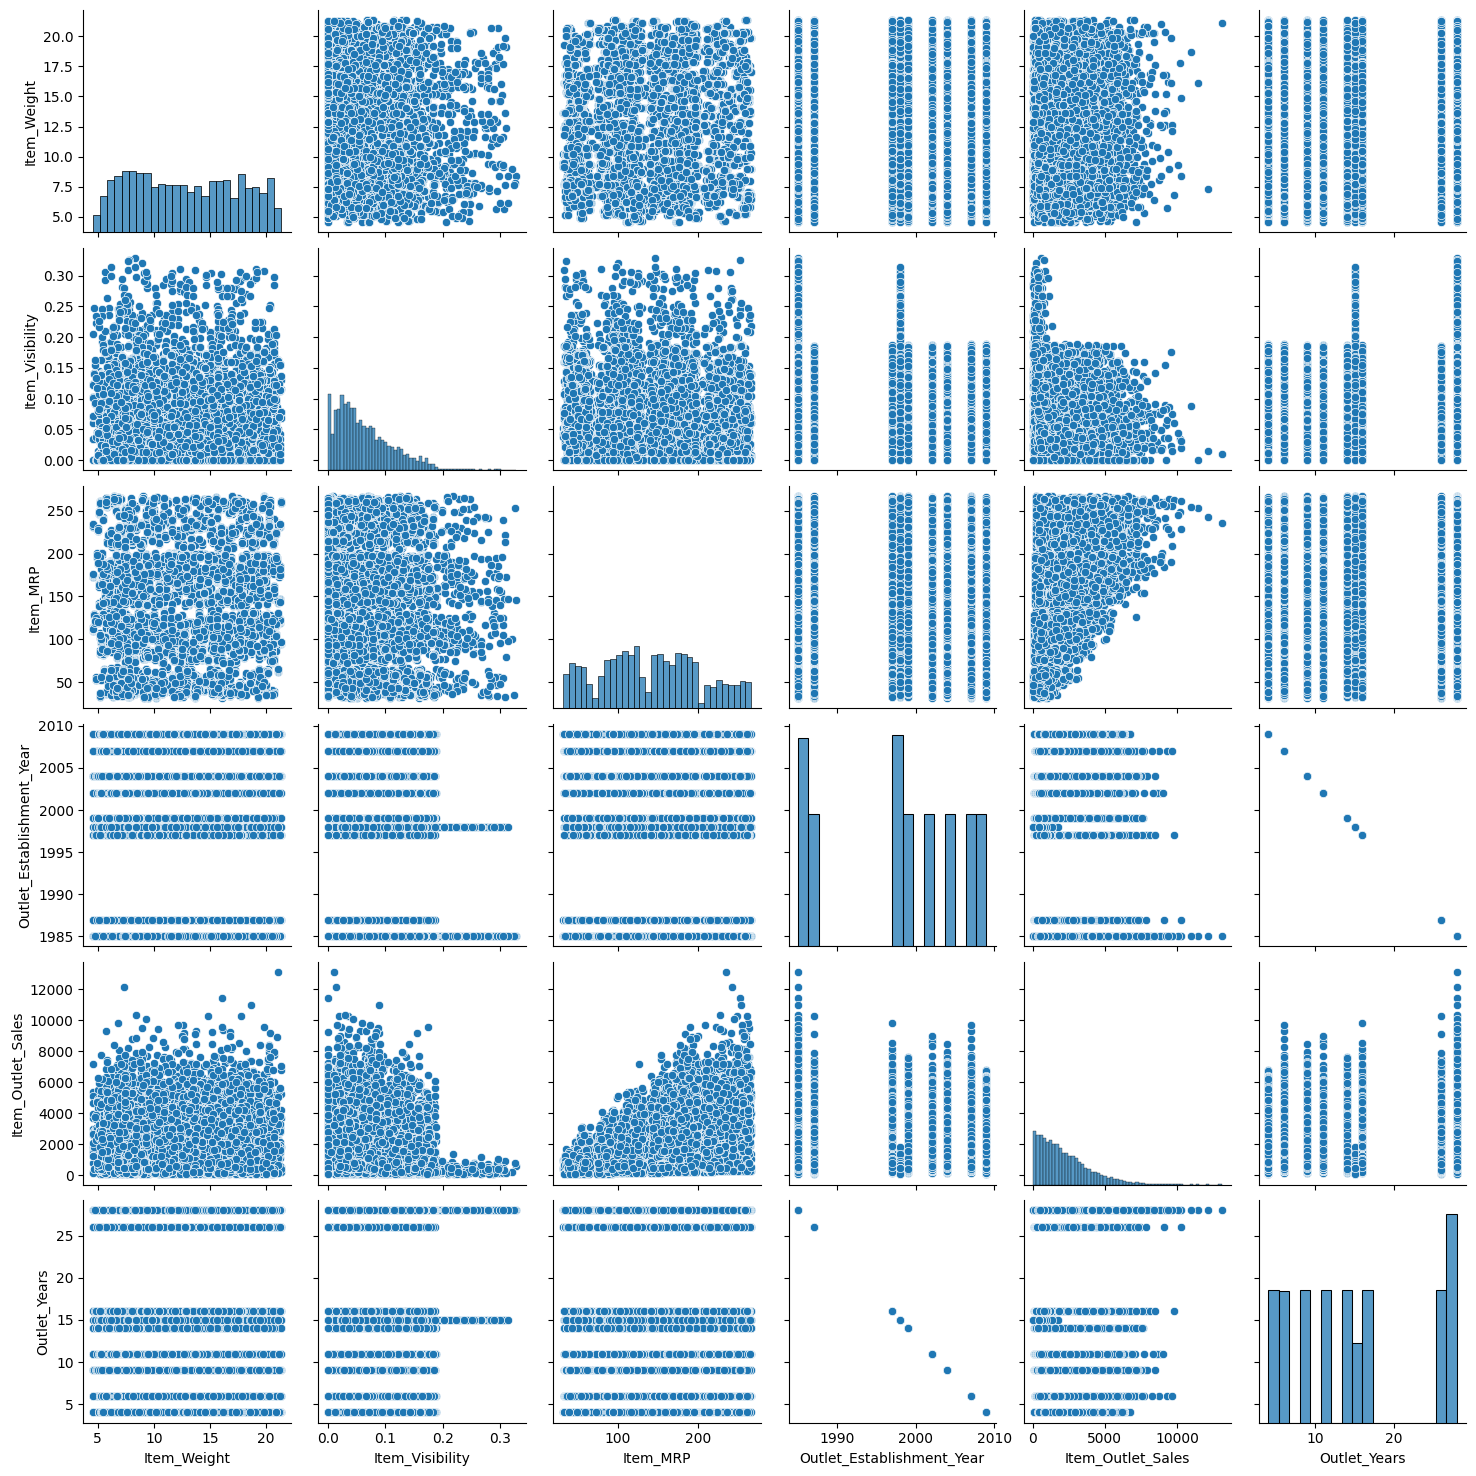

In [37]:
sns.pairplot(data)
plt.show()

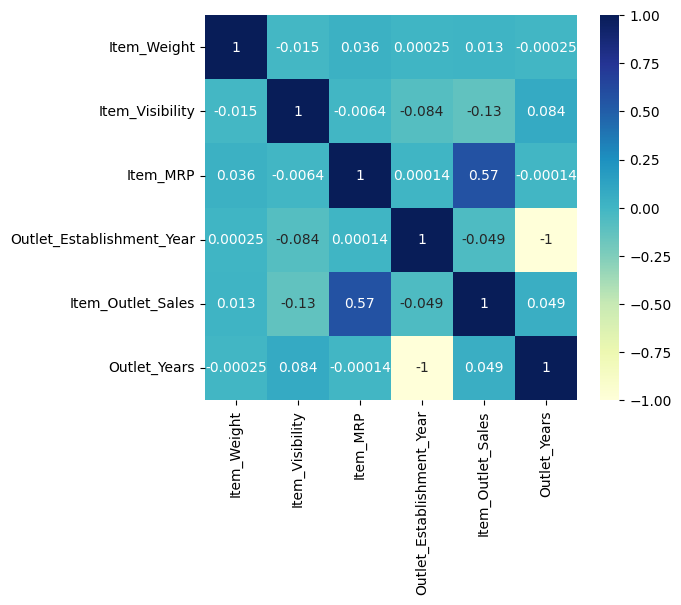

In [39]:
# Select only numeric columns
num_data = data.select_dtypes(include=[float, int])

plt.figure(figsize = (6,5))
sns.heatmap(num_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
categorical_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        categorical_cols.append(col)
        
print(categorical_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source', 'Item_Type_Combined']


In [41]:
cat_cols = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']

In [42]:
for col in cat_cols:
    dummies = pd.get_dummies(data[col], prefix=col, prefix_sep='_', drop_first=True, dtype=int)
    data = pd.concat([data, dummies], axis=1)
    data.drop(columns=[col], inplace=True)
    
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_Non-Edible,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,train,14,0,...,1,1,0,0,0,1,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,train,4,0,...,0,1,0,0,1,0,1,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,train,14,0,...,1,1,0,0,0,1,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,1998,732.3800,train,15,0,...,0,0,0,0,1,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,53.8614,1987,994.7052,train,26,1,...,0,0,0,0,1,1,0,0,0,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Identifier                    14204 non-null  object 
 1   Item_Weight                        14204 non-null  float64
 2   Item_Visibility                    14204 non-null  float64
 3   Item_Type                          14204 non-null  object 
 4   Item_MRP                           14204 non-null  float64
 5   Outlet_Establishment_Year          14204 non-null  int64  
 6   Item_Outlet_Sales                  8523 non-null   float64
 7   source                             14204 non-null  object 
 8   Outlet_Years                       14204 non-null  int64  
 9   Item_Fat_Content_Non-Edible        14204 non-null  int64  
 10  Item_Fat_Content_Regular           14204 non-null  int64  
 11  Outlet_Identifier_OUT013           14204 non-null  int

In [44]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\cyphe\AppData\Local\Temp\ipykernel_11144\2645609187.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source'],axis=1,inplace=True)
C:\Users\cyphe\AppData\Local\Temp\ipykernel_11144\2645609187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


In [45]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
8523,FDW58,20.750,0.007565,107.8622,NaN,14,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
8524,FDW14,8.300,0.038428,87.3198,NaN,6,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
8525,NCN55,14.600,0.099575,241.7538,NaN,15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8526,FDQ58,7.315,0.015388,155.0340,NaN,6,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
8527,FDY38,13.600,0.118599,234.2300,NaN,28,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0.016047,249.8092,3735.1380,14,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,443.4228,4,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
2,FDN15,17.50,0.016760,141.6180,2097.2700,14,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,FDX07,19.20,0.000000,182.0950,732.3800,15,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,NCD19,8.93,0.000000,53.8614,994.7052,26,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1


In [47]:
y = train['Item_Outlet_Sales']

# Putting predictor variables to X
X = train.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 24)
(2557, 24)
(5966,)
(2557,)


In [49]:
scaler = MinMaxScaler()

#creating a list of numeric variables

num_col = ['Item_Weight','Item_MRP','Outlet_Years']

X_train[num_col] = scaler.fit_transform(X_train[num_col])

# X-train dataframe after standard scaling
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
4122,0.082763,0.093171,0.407289,0.416667,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
6590,0.088121,0.141138,0.525109,0.916667,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
5460,0.541530,0.048980,0.497943,1.000000,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4541,0.443287,0.075702,0.395707,0.291667,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4186,0.359929,0.035248,0.226137,0.416667,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


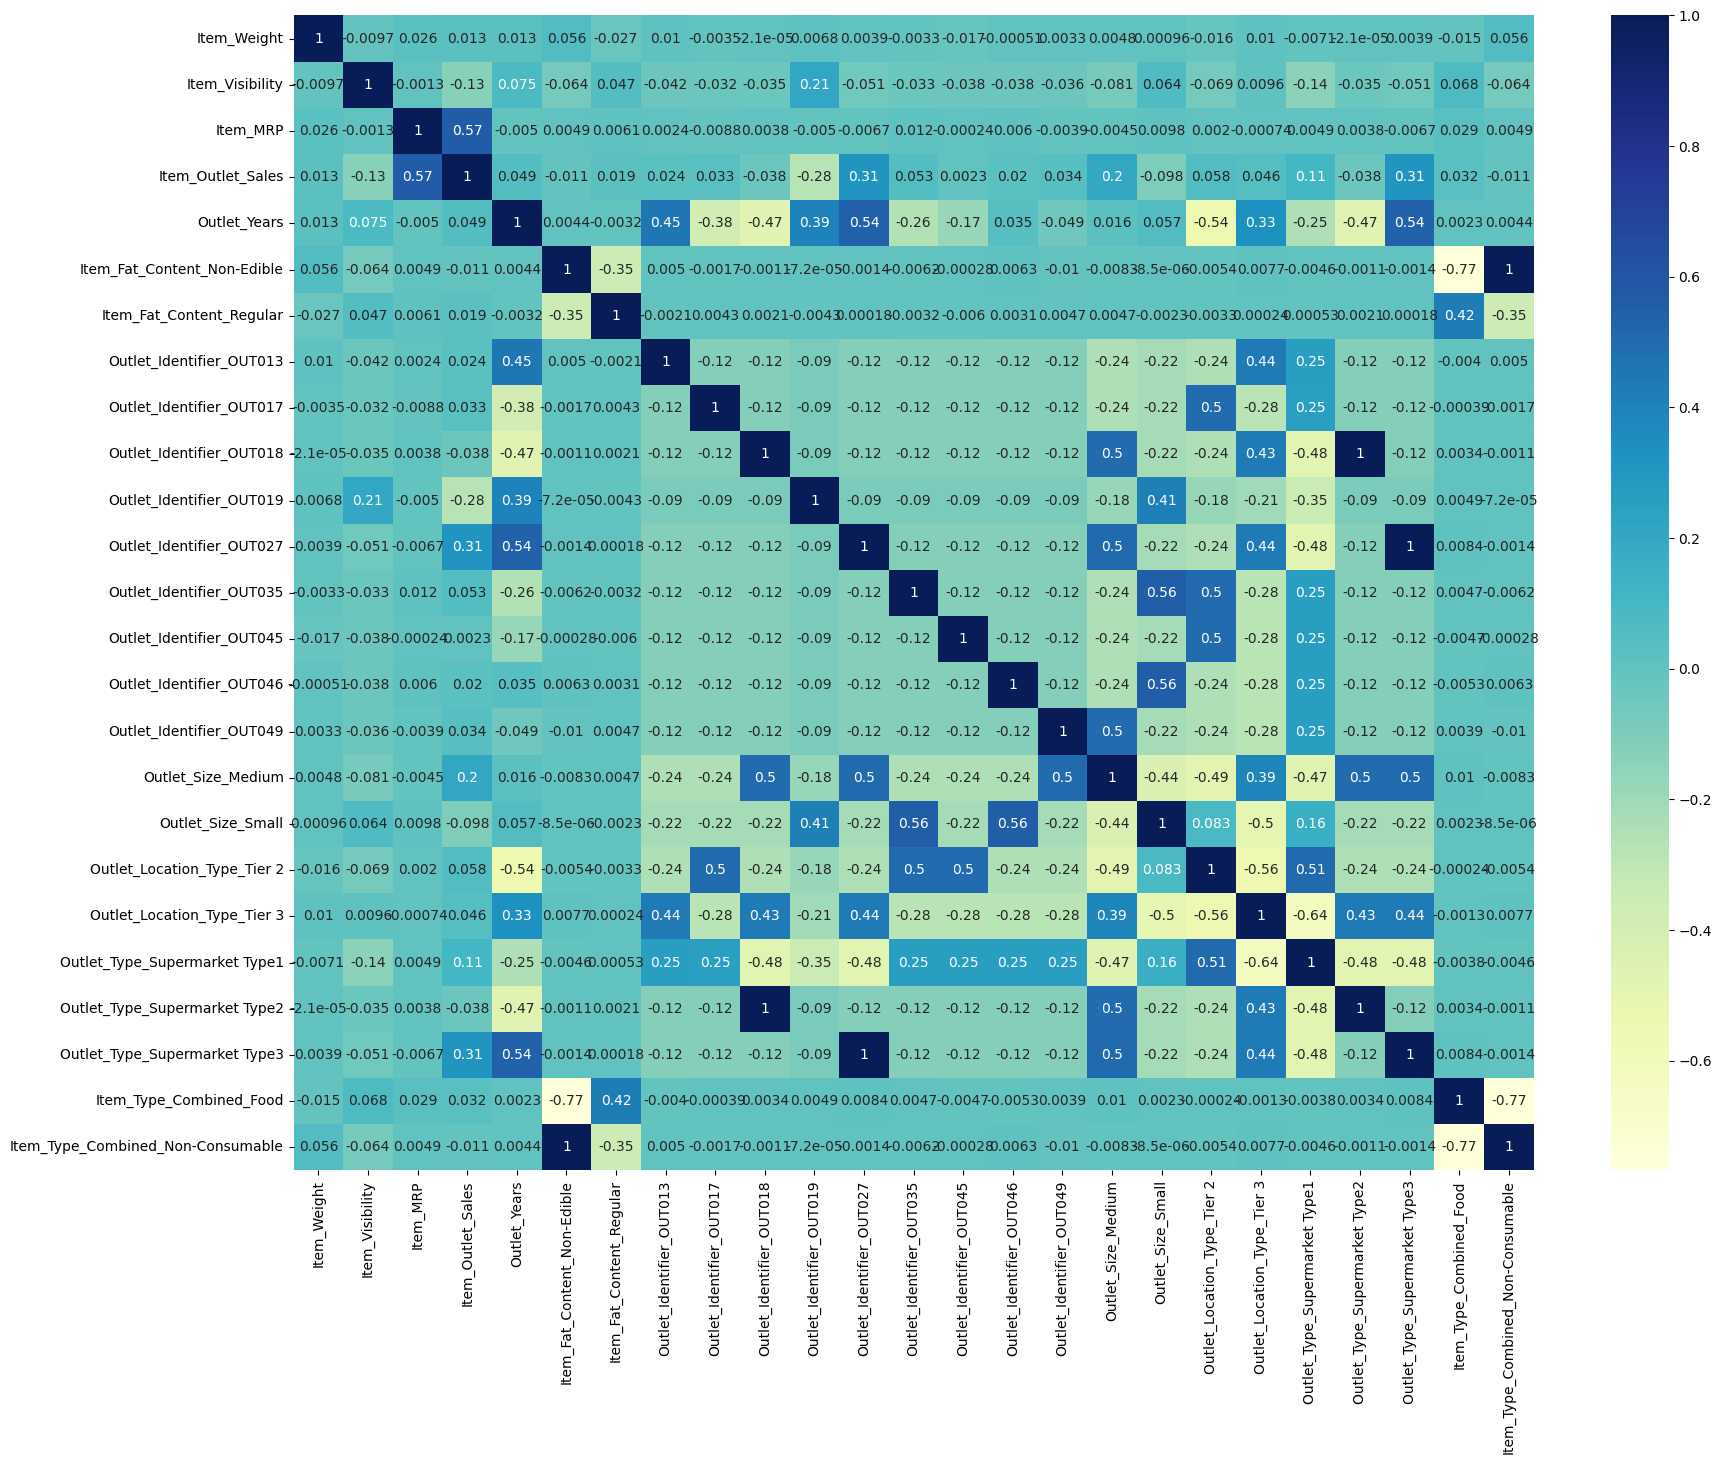

In [52]:
# Select only numeric columns
num1_train = train.select_dtypes(include=[float, int])

plt.figure(figsize = (20, 15))
sns.heatmap(num1_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [53]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [54]:
X_train_lm1 = sm.add_constant(X_train)

#Fit Ordinary Least Squares (OLS) regression model

lr_1 = sm.OLS(y_train,X_train_lm1).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     521.5
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:21:25   Log-Likelihood:                -50395.
No. Observations:                5966   AIC:                         1.008e+05
Df Residuals:                    5950   BIC:                         1.009e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -5.464e+14   1.09e+15     -0.500      0.617   -2.69e+15     1.6e+15
Item_Weight                          16.4823     53.038      0.311      0.756     -87.491     120.456
Item_Visibility                    -342.7669    298.481     -1.148      0.251    -927.898     242.364
Item_MRP                           3674.9358     55.166     66.615      0.000    3566.790    3783.082
Outlet_Years                       6.142e+14   1.23e+15      0.500      0.617   -1.79e+15    3.02e+15
Item_Fat_Content_Non-Edible        6.278e+12   1.26e+13      0.500      0.617   -1.83e+13    3.09e+13
Item_Fat_Content_Regular             82.6855     33.843      2.443      0.015      16.341     149.030
Outlet_Identifier_OUT013          -1.661e+15   3.32e+15     -0.500      0.617   -8.18e+15    4.85e+15
Outlet_Identifier_OUT017          -2.097e+14   4.19e+14     -0.500      0.617   -1.03e+15    6.13e+14
Outlet_Identifier_OUT018           3.462e+14   6.92e+14      0.500      0.617   -1.01e+15     1.7e+15
Outlet_Identifier_OUT019           4.565e+14   9.13e+14      0.500      0.617   -1.33e+15    2.25e+15
Outlet_Identifier_OUT027           4.766e+13   9.53e+13      0.500      0.617   -1.39e+14    2.35e+14
Outlet_Identifier_OUT035           2.378e+14   4.76e+14      0.500      0.617   -6.95e+14    1.17e+15
Outlet_Identifier_OUT045          -3.377e+14   6.75e+14     -0.500      0.617   -1.66e+15    9.86e+14
Outlet_Identifier_OUT046          -6.163e+14   1.23e+15     -0.500      0.617   -3.03e+15     1.8e+15
Outlet_Identifier_OUT049           -6.79e+14   1.36e+15     -0.500      0.617   -3.34e+15    1.98e+15
Outlet_Size_Medium                -4.104e+14   8.21e+14     -0.500      0.617   -2.02e+15     1.2e+15
Outlet_Size_Small                 -5.243e+14   1.05e+15     -0.500      0.617   -2.58e+15    1.53e+15
Outlet_Location_Type_Tier 2        -6.75e+14   1.35e+15     -0.500      0.617   -3.32e+15    1.97e+15
Outlet_Location_Type_Tier 3        2.649e+14    5.3e+14      0.500      0.617   -7.74e+14     1.3e+15
Outlet_Type_Supermarket Type1       1.38e+15   2.76e+15      0.500      0.617   -4.03e+15    6.79e+15
Outlet_Type_Supermarket Type2      3.457e+14   6.91e+14      0.500      0.617   -1.01e+15     1.7e+15
Outlet_Type_Supermarket Type3      3.006e+13   6.01e+13      0.500      0.617   -8.78e+13    1.48e+14
Item_Type_Combined_Food              20.4384     53.516      0.382      0.703     -84.473     125.349
Item_Type_Combined_Non-Consumable -6.278e+12   1.26e+13     -0.500      0.617   -3.09e+13    1.83e+13
==============================================================================
Omnibus:                      689.406   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            

In [55]:
calculateVIF(X_train)

C:\Users\cyphe\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
3,Outlet_Years,inf
7,Outlet_Identifier_OUT017,inf
6,Outlet_Identifier_OUT013,inf
4,Item_Fat_Content_Non-Edible,inf
11,Outlet_Identifier_OUT035,inf
10,Outlet_Identifier_OUT027,inf
9,Outlet_Identifier_OUT019,inf
8,Outlet_Identifier_OUT018,inf
16,Outlet_Size_Small,inf
17,Outlet_Location_Type_Tier 2,inf


In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select = 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Item_Weight', np.False_, np.int64(13)),
 ('Item_Visibility', np.False_, np.int64(8)),
 ('Item_MRP', np.False_, np.int64(7)),
 ('Outlet_Years', np.True_, np.int64(1)),
 ('Item_Fat_Content_Non-Edible', np.False_, np.int64(9)),
 ('Item_Fat_Content_Regular', np.False_, np.int64(11)),
 ('Outlet_Identifier_OUT013', np.True_, np.int64(1)),
 ('Outlet_Identifier_OUT017', np.True_, np.int64(1)),
 ('Outlet_Identifier_OUT018', np.False_, np.int64(6)),
 ('Outlet_Identifier_OUT019', np.False_, np.int64(3)),
 ('Outlet_Identifier_OUT027', np.False_, np.int64(4)),
 ('Outlet_Identifier_OUT035', np.True_, np.int64(1)),
 ('Outlet_Identifier_OUT045', np.True_, np.int64(1)),
 ('Outlet_Identifier_OUT046', np.False_, np.int64(5)),
 ('Outlet_Identifier_OUT049', np.True_, np.int64(1)),
 ('Outlet_Size_Medium', np.False_, np.int64(2)),
 ('Outlet_Size_Small', np.True_, np.int64(1)),
 ('Outlet_Location_Type_Tier 2', np.True_, np.int64(1)),
 ('Outlet_Location_Type_Tier 3', np.True_, np.int64(1)),
 ('Outlet_Type_S

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['Outlet_Years', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT046',
       'Outlet_Size_Medium', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable'],
      dtype='object')

In [60]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,Outlet_Years,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT049,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4122,0.416667,0,0,0,0,1,0,0,0,1,0,0
6590,0.916667,1,0,0,0,0,0,0,1,1,0,0
5460,1.000000,0,0,0,0,0,0,0,1,0,0,1
4541,0.291667,0,0,0,1,0,0,1,0,1,0,0
4186,0.416667,0,0,0,0,1,0,0,0,1,0,0


In [61]:
X_train_lm2 = sm.add_constant(X_train_rfe)


lr_2 = sm.OLS(y_train,X_train_lm2).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:23:45   Log-Likelihood:                -52066.
No. Observations:                5966   AIC:                         1.042e+05
Df Residuals:                    5956   BIC:                         1.042e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2.039e+14   1.94e+15     -0.105      0.916   -4.01e+15     3.6e+15
Outlet_Years                   1.075e+14   4.26e+15      0.025      0.980   -8.23e+15    8.45e+15
Outlet_Identifier_OUT013       -1.03e+14   4.08e+15     -0.025      0.980    -8.1e+15    7.89e+15
Outlet_Identifier_OUT017       7.375e+14    5.2e+15      0.142      0.887   -9.46e+15    1.09e+16
Outlet_Identifier_OUT035       6.277e+14   4.37e+15      0.144      0.886   -7.94e+15     9.2e+15
Outlet_Identifier_OUT045       7.151e+14   5.36e+15      0.133      0.894   -9.79e+15    1.12e+16
Outlet_Identifier_OUT049       1.054e+14   2.59e+15      0.041      0.968   -4.97e+15    5.18e+15
Outlet_Size_Small              9.641e+13   2.91e+15      0.033      0.974   -5.61e+15     5.8e+15
Outlet_Location_Type_Tier 2   -5.963e+14   4.07e+15     -0.147      0.883   -8.57e+15    7.37e+15
Outlet_Location_Type_Tier 3    1.546e+14   1.19e+15      0.129      0.897   -2.19e+15     2.5e+15
Outlet_Type_Supermarket Type1  5.376e+13   2.13e+15      0.025      0.980   -4.12e+15    4.22e+15
Outlet_Type_Supermarket Type2  4.928e+13   1.95e+15      0.025      0.980   -3.77e+15    3.87e+15
Outlet_Type_Supermarket Type3 -5.824e+13    2.3e+15     -0.025      0.980   -4.58e+15    4.46e+15
==============================================================================
Omnibus:                     1054.351   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2030.563
Skew:                           1.083   Prob(JB):                         0.00
Kurtosis:                       4.866   Cond. No.                     1.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.52e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
calculateVIF(X_train_rfe)

C:\Users\cyphe\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,Outlet_Years,inf
2,Outlet_Identifier_OUT017,inf
10,Outlet_Type_Supermarket Type2,inf
6,Outlet_Size_Small,inf
8,Outlet_Location_Type_Tier 3,101263.52
1,Outlet_Identifier_OUT013,83483.14
11,Outlet_Type_Supermarket Type3,20129.88
7,Outlet_Location_Type_Tier 2,12932.45
4,Outlet_Identifier_OUT045,7757.89
3,Outlet_Identifier_OUT035,2104.55


In [63]:
X_train_m3 = X_train_rfe.drop(['Outlet_Type_Supermarket Type2'],axis = 1)
X_train_m3.head()

,Outlet_Years,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT049,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
4122,0.416667,0,0,0,0,1,0,0,0,1,0
6590,0.916667,1,0,0,0,0,0,0,1,1,0
5460,1.000000,0,0,0,0,0,0,0,1,0,1
4541,0.291667,0,0,0,1,0,0,1,0,1,0
4186,0.416667,0,0,0,0,1,0,0,0,1,0


In [64]:
X_train_lm3 = sm.add_constant(X_train_m3)

lr_3 = sm.OLS(y_train,X_train_lm3).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:24:44   Log-Likelihood:                -52065.
No. Observations:                5966   AIC:                         1.042e+05
Df Residuals:                    5956   BIC:                         1.042e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -3.517e+14   1.37e+15     -0.257      0.797   -3.04e+15    2.33e+15
Outlet_Years                  -3482.9431    209.980    -16.587      0.000   -3894.581   -3071.305
Outlet_Identifier_OUT013       3332.5589    286.716     11.623      0.000    2770.491    3894.627
Outlet_Identifier_OUT017       1.305e+15   5.08e+15      0.257      0.797   -8.66e+15    1.13e+16
Outlet_Identifier_OUT035       9.531e+14   3.71e+15      0.257      0.797   -6.32e+15    8.23e+15
Outlet_Identifier_OUT045       1.305e+15   5.08e+15      0.257      0.797   -8.66e+15    1.13e+16
Outlet_Identifier_OUT049       3.517e+14   1.37e+15      0.257      0.797   -2.33e+15    3.04e+15
Outlet_Size_Small              3.517e+14   1.37e+15      0.257      0.797   -2.33e+15    3.04e+15
Outlet_Location_Type_Tier 2   -9.531e+14   3.71e+15     -0.257      0.797   -8.23e+15    6.32e+15
Outlet_Location_Type_Tier 3    3.517e+14   1.37e+15      0.257      0.797   -2.33e+15    3.04e+15
Outlet_Type_Supermarket Type1   215.5782    142.459      1.513      0.130     -63.692     494.849
Outlet_Type_Supermarket Type3  5226.3447    187.253     27.911      0.000    4859.260    5593.429
==============================================================================
Omnibus:                     1051.578   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2022.449
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       4.861   Cond. No.                     1.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.61e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
calculateVIF(X_train_m3)

C:\Users\cyphe\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,Outlet_Identifier_OUT017,inf
4,Outlet_Identifier_OUT045,inf
3,Outlet_Identifier_OUT035,inf
7,Outlet_Location_Type_Tier 2,inf
6,Outlet_Size_Small,37.29
1,Outlet_Identifier_OUT013,21.02
5,Outlet_Identifier_OUT049,14.47
0,Outlet_Years,14.19
9,Outlet_Type_Supermarket Type1,12.19
10,Outlet_Type_Supermarket Type3,9.40


In [66]:
X_train_m4 = X_train_m3.drop(['Outlet_Identifier_OUT049'],axis = 1)
X_train_m4.head()

,Outlet_Years,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
4122,0.416667,0,0,0,0,0,0,0,1,0
6590,0.916667,1,0,0,0,0,0,1,1,0
5460,1.000000,0,0,0,0,0,0,1,0,1
4541,0.291667,0,0,0,1,0,1,0,1,0
4186,0.416667,0,0,0,0,0,0,0,1,0


In [67]:
X_train_lm4 = sm.add_constant(X_train_m4)


lr_4 = sm.OLS(y_train,X_train_lm4).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:25:31   Log-Likelihood:                -52065.
No. Observations:                5966   AIC:                         1.042e+05
Df Residuals:                    5956   BIC:                         1.042e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3627.8887    223.304     16.246      0.000    3190.132    4065.646
Outlet_Years                  -3485.0539    210.545    -16.553      0.000   -3897.798   -3072.310
Outlet_Identifier_OUT013       3333.2435    286.766     11.624      0.000    2771.079    3895.408
Outlet_Identifier_OUT017       4.941e+14   4.93e+15      0.100      0.920   -9.17e+15    1.02e+16
Outlet_Identifier_OUT035       4.941e+14   4.93e+15      0.100      0.920   -9.17e+15    1.02e+16
Outlet_Identifier_OUT045       4.941e+14   4.93e+15      0.100      0.920   -9.17e+15    1.02e+16
Outlet_Size_Small               195.9968     84.232      2.327      0.020      30.872     361.121
Outlet_Location_Type_Tier 2   -4.941e+14   4.93e+15     -0.100      0.920   -1.02e+16    9.17e+15
Outlet_Location_Type_Tier 3   -1689.4550    197.016     -8.575      0.000   -2075.678   -1303.232
Outlet_Type_Supermarket Type1   215.9185    142.453      1.516      0.130     -63.341     495.178
Outlet_Type_Supermarket Type3  5225.5814    187.227     27.910      0.000    4858.548    5592.615
==============================================================================
Omnibus:                     1052.951   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2026.215
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       4.863   Cond. No.                     7.41e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
calculateVIF(X_train_m4)

C:\Users\cyphe\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
3,Outlet_Identifier_OUT035,inf
2,Outlet_Identifier_OUT017,inf
4,Outlet_Identifier_OUT045,inf
6,Outlet_Location_Type_Tier 2,inf
0,Outlet_Years,10.29
5,Outlet_Size_Small,5.14
8,Outlet_Type_Supermarket Type1,4.90
9,Outlet_Type_Supermarket Type3,3.96
1,Outlet_Identifier_OUT013,3.38
7,Outlet_Location_Type_Tier 3,2.66


In [70]:
X_train_m5 = X_train_m4.drop(['Outlet_Identifier_OUT035'],axis = 1)
X_train_m5.head()

,Outlet_Years,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT045,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
4122,0.416667,0,0,0,0,0,0,1,0
6590,0.916667,1,0,0,0,0,1,1,0
5460,1.000000,0,0,0,0,0,1,0,1
4541,0.291667,0,0,1,0,1,0,1,0
4186,0.416667,0,0,0,0,0,0,1,0


In [71]:
X_train_lm5 = sm.add_constant(X_train_m5)


lr_5 = sm.OLS(y_train,X_train_lm5).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:56:45   Log-Likelihood:                -52065.
No. Observations:                5966   AIC:                         1.042e+05
Df Residuals:                    5956   BIC:                         1.042e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3629.6569    222.606     16.305      0.000    3193.269    4066.045
Outlet_Years                  -3487.3751    209.267    -16.665      0.000   -3897.615   -3077.135
Outlet_Identifier_OUT013       3334.0382    286.655     11.631      0.000    2772.090    3895.986
Outlet_Identifier_OUT017       -357.6011    117.634     -3.040      0.002    -588.207    -126.995
Outlet_Identifier_OUT045        182.3113    121.915      1.495      0.135     -56.685     421.308
Outlet_Size_Small               196.0194     84.231      2.327      0.020      30.896     361.143
Outlet_Location_Type_Tier 2    -850.0255    102.965     -8.256      0.000   -1051.874    -648.177
Outlet_Location_Type_Tier 3   -1689.6408    197.007     -8.577      0.000   -2075.845   -1303.436
Outlet_Type_Supermarket Type1   215.8787    142.452      1.515      0.130     -63.379     495.136
Outlet_Type_Supermarket Type3  5225.5686    187.227     27.910      0.000    4858.537    5592.600
==============================================================================
Omnibus:                     1053.182   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2027.276
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       4.864   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
calculateVIF(X_train_m5)

,Features,VIF
0,Outlet_Years,10.29
5,Outlet_Location_Type_Tier 2,8.02
4,Outlet_Size_Small,5.14
7,Outlet_Type_Supermarket Type1,4.94
3,Outlet_Identifier_OUT045,4.42
8,Outlet_Type_Supermarket Type3,3.96
2,Outlet_Identifier_OUT017,3.57
1,Outlet_Identifier_OUT013,3.38
6,Outlet_Location_Type_Tier 3,2.66


In [73]:
X_train_m6 = X_train_m5.drop(['Outlet_Years'],axis = 1)
X_train_m6.head()

,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT045,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
4122,0,0,0,0,0,0,1,0
6590,1,0,0,0,0,1,1,0
5460,0,0,0,0,0,1,0,1
4541,0,0,1,0,1,0,1,0
4186,0,0,0,0,0,0,1,0


In [74]:
X_train_lm6 = sm.add_constant(X_train_m6)


lr_6 = sm.OLS(y_train,X_train_lm6).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     195.9
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          2.91e-295
Time:                        18:57:21   Log-Likelihood:                -52201.
No. Observations:                5966   AIC:                         1.044e+05
Df Residuals:                    5957   BIC:                         1.045e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           432.8964    115.532      3.747      0.000     206.411     659.382
Outlet_Identifier_OUT013       -984.2953    125.380     -7.851      0.000   -1230.085    -738.505
Outlet_Identifier_OUT017       -212.2938    120.004     -1.769      0.077    -447.546      22.959
Outlet_Identifier_OUT045       -398.9178    119.501     -3.338      0.001    -633.184    -164.652
Outlet_Size_Small               -94.5952     84.298     -1.122      0.262    -259.850      70.660
Outlet_Location_Type_Tier 2     167.1255     84.828      1.970      0.049       0.833     333.418
Outlet_Location_Type_Tier 3     885.0051    125.045      7.077      0.000     639.871    1130.139
Outlet_Type_Supermarket Type1  1959.5663     98.886     19.816      0.000    1765.714    2153.418
Outlet_Type_Supermarket Type3  2360.3081     75.808     31.135      0.000    2211.697    2508.919
==============================================================================
Omnibus:                     1041.901   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1901.214
Skew:                           1.099   Prob(JB):                         0.00
Kurtosis:                       4.679   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
calculateVIF(X_train_m6)

,Features,VIF
4,Outlet_Location_Type_Tier 2,5.21
6,Outlet_Type_Supermarket Type1,4.37
2,Outlet_Identifier_OUT045,2.99
1,Outlet_Identifier_OUT017,2.92
3,Outlet_Size_Small,2.38
0,Outlet_Identifier_OUT013,2.34
5,Outlet_Location_Type_Tier 3,2.29
7,Outlet_Type_Supermarket Type3,1.66


In [76]:
round(lr_6.params.sort_values(ascending=False),2)

Outlet_Type_Supermarket Type3    2360.31
Outlet_Type_Supermarket Type1    1959.57
Outlet_Location_Type_Tier 3       885.01
const                             432.90
Outlet_Location_Type_Tier 2       167.13
Outlet_Size_Small                 -94.60
Outlet_Identifier_OUT017         -212.29
Outlet_Identifier_OUT045         -398.92
Outlet_Identifier_OUT013         -984.30
dtype: float64

In [77]:
y_train_pred = lr_6.predict(X_train_lm6)

C:\Users\cyphe\AppData\Local\Temp\ipykernel_11144\474815616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


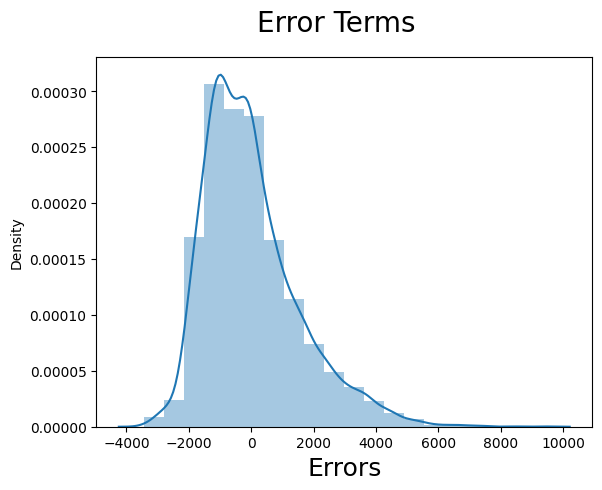

In [78]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [79]:
#creating a list of numeric variables

num_col = ['Item_Weight','Item_MRP','Outlet_Years']

X_test[num_col] = scaler.transform(X_test[num_col])

# X-train dataframe after standard scaling
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
3454,0.961298,0.169667,0.645869,0.916667,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3386,0.571301,0.035470,0.955025,0.083333,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
235,0.282525,0.043574,0.685623,1.000000,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7201,0.845192,0.052335,0.325567,0.083333,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
7782,0.508782,0.044192,0.632297,0.500000,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [80]:
X_test_sm = sm.add_constant(X_test)

In [81]:
col1 = X_train_lm6.columns

X_test_lm6 = X_test_sm[col1]

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2557 entries, 3454 to 7125
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          2557 non-null   float64
 1   Outlet_Identifier_OUT013       2557 non-null   int64  
 2   Outlet_Identifier_OUT017       2557 non-null   int64  
 3   Outlet_Identifier_OUT045       2557 non-null   int64  
 4   Outlet_Size_Small              2557 non-null   int64  
 5   Outlet_Location_Type_Tier 2    2557 non-null   int64  
 6   Outlet_Location_Type_Tier 3    2557 non-null   int64  
 7   Outlet_Type_Supermarket Type1  2557 non-null   int64  
 8   Outlet_Type_Supermarket Type3  2557 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 199.8 KB


In [82]:
y_test_pred = lr_6.predict(X_test_lm6)

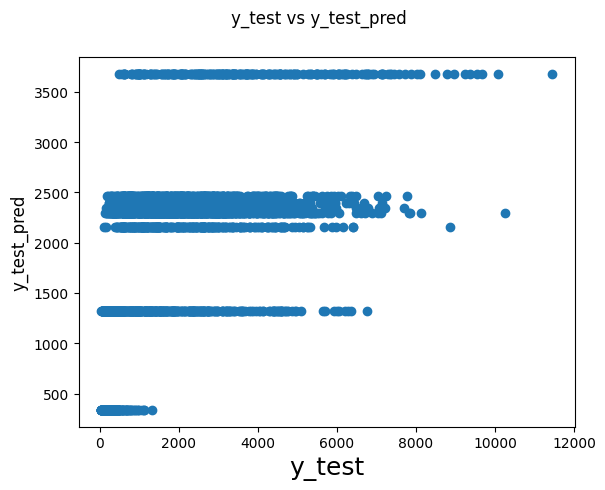

In [83]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 12)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 12)
plt.show()

In [84]:
r2 = r2_score(y_true = y_test,y_pred = y_test_pred)
r2

0.18706165045747947

In [85]:
n = X_test_lm6.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_lm6.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.18418907678418428